In [56]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from matplotlib import pyplot as plt


In [46]:
pre_met = pd.read_csv('/mnt/Mercury/home/liuzhaoyang/project/metabolomics/tools/scFEA/GBM_Multi_Omics/259_T_balance.csv',
                     index_col=0)
pre_met[pre_met < 0] = 0

pre_met_name_map = pd.read_csv('pre_met_name_map.csv', index_col=0)
pre_met.columns = list(pre_met_name_map.loc[pre_met.columns,:].loc[:,'HMDB'])
# pre_met = pre_met.T

ref_met = pd.read_csv('/mnt/Venus/home/liuzhaoyang/data/GBM_Spatial_MultiOmics/259_T/Integrated_ST_metabolite_HMDB_259_T.tsv',
                     sep='\t',
                      index_col=0
                     )

# common met
common_met = set(pre_met.columns).intersection(set(ref_met.index))

pre_met = pre_met.loc[:,common_met].T
ref_met = ref_met.loc[common_met,:]

/tmp/ipykernel_474656/1878284297.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pre_met = pre_met.loc[:,common_met].T
/tmp/ipykernel_474656/1878284297.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ref_met = ref_met.loc[common_met,:]


In [43]:
pre_met.shape

(3326, 70)

In [41]:
common_met

{'HMDB0000045',
 'HMDB0000056',
 'HMDB0000067',
 'HMDB0000094',
 'HMDB0000097',
 'HMDB0000101',
 'HMDB0000122',
 'HMDB0000125',
 'HMDB0000134',
 'HMDB0000148',
 'HMDB0000156',
 'HMDB0000162',
 'HMDB0000175',
 'HMDB0000177',
 'HMDB0000182',
 'HMDB0000187',
 'HMDB0000214',
 'HMDB0000223',
 'HMDB0000280',
 'HMDB0000288',
 'HMDB0000290',
 'HMDB0000292',
 'HMDB0000696',
 'HMDB0001256',
 'HMDB0001397',
 'HMDB0001414',
 'HMDB0001517',
 'HMDB0001546'}

In [42]:
len(common_met)

28

In [47]:
pre_met.head()

,AAACAAGTATCTCCCA-1,AAACAGAGCGACTCCT-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCCGAACGAAATC-1,AAACCGGGTAGGTACC-1,AAACCGTTCGTCCAGG-1,AAACCTAAGCAGCCGG-1,AAACGAAGAACATACC-1,...,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTATTACACG-1,TTGTTTGTGTAAATTC-1
HMDB0000101,0.000536,0.000667,0.000931,0.000520,0.000461,0.000532,0.001222,0.000672,0.000640,0.000748,...,0.00058,0.000629,0.000912,0.000544,0.000632,0.000550,0.000555,0.000768,0.000462,0.000896
HMDB0000094,0.000900,0.000806,0.000000,0.000898,0.000956,0.000905,0.000943,0.000821,0.000795,0.000848,...,0.00087,0.000823,0.000870,0.000901,0.000857,0.000893,0.000882,0.000840,0.000993,0.000788
HMDB0000696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.008794,0.000000,0.000000,0.000000,0.000000,0.003199,0.000000,0.000000
HMDB0000122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HMDB0000182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
ref_met.head()

,AAACAAGTATCTCCCA-1,AAACAGAGCGACTCCT-1,AAACAGGGTCTATATT-1,AAACAGTGTTCCTGGG-1,AAACATTTCCCGGATT-1,AAACCCGAACGAAATC-1,AAACCGGGTAGGTACC-1,AAACCGTTCGTCCAGG-1,AAACCTAAGCAGCCGG-1,AAACGAAGAACATACC-1,...,TTGTGTATGCCACCAA-1,TTGTGTTTCCCGAAAG-1,TTGTTAGCAAATTCGA-1,TTGTTCAGTGTGCTAC-1,TTGTTGTGTGTCAAGA-1,TTGTTTCACATCCAGG-1,TTGTTTCATTAGTCTA-1,TTGTTTCCATACAACT-1,TTGTTTGTATTACACG-1,TTGTTTGTGTAAATTC-1
name,,,,,,,,,,,,,,,,,,,,,
HMDB0000101,0.000000,0.000000,6969.290039,4703.734253,0.000000,832.736267,4210.183960,5325.998454,0.000000,2318.002767,...,7769.209778,8636.295573,5108.763672,5312.955078,5023.337219,4554.538940,5381.204285,2966.823405,0.0,6980.309408
HMDB0000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1522.542074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
HMDB0000696,0.000000,0.000000,0.000000,0.000000,894.775452,0.000000,0.000000,658.171143,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,994.613586,0.000000,0.000000,0.0,0.000000
HMDB0000122,2914.213867,3684.174927,2291.804443,0.000000,1073.306274,0.000000,2359.085327,1904.856120,2082.556722,2914.129395,...,1157.853577,718.219076,3182.910156,1730.765625,1654.294678,1343.088501,1300.574097,3016.510091,0.0,1780.816569
HMDB0000182,1308.630249,0.000000,0.000000,0.000000,961.579590,0.000000,1659.254761,680.720988,1223.706299,747.413005,...,0.000000,890.555176,0.000000,1143.408569,1125.365356,0.000000,1236.746582,692.424886,0.0,0.000000


/fs/home/liuzhaoyang/biosoft/mambaforge/envs/MS/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


0.08911622196281174
-0.020422421777440164


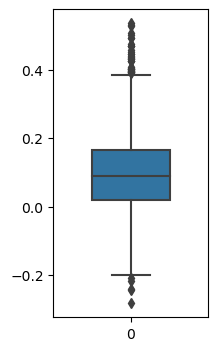

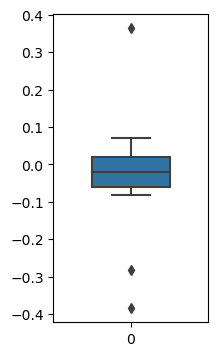

In [57]:
# spot-wise
scFEA_spot_level_spearman_corrs, scFEA_spot_level_spearman_corrs_p = [], []

for tmp_i, tmp_id in enumerate(pre_met.columns):
    ground_sr = ref_met.loc[:,tmp_id]
    tmp_corr, tmp_p = spearmanr(pre_met.iloc[:,tmp_i].to_numpy(), ground_sr.to_numpy())
    scFEA_spot_level_spearman_corrs.append(tmp_corr)
    scFEA_spot_level_spearman_corrs_p.append(tmp_p)

# met-wise
scFEA_met_level_spearman_corrs, scFEA_met_level_spearman_corrs_p = [], []

for tmp_i, tmp_id in enumerate(pre_met.index):
    ground_sr = ref_met.loc[tmp_id,:]
    tmp_corr, tmp_p = spearmanr(np.abs(pre_met.iloc[tmp_i,:].to_numpy()), ground_sr.to_numpy())
    scFEA_met_level_spearman_corrs.append(tmp_corr)
    scFEA_met_level_spearman_corrs_p.append(tmp_p)

# scFEA_compass_spearman_corr_df = pd.DataFrame({'scFEA':scFEA_spot_level_spearman_corrs_p,
#                                             'Compass':compass_meta_level_spearman_corrs})


plt.figure(figsize=(2,4))
sns.boxplot(scFEA_spot_level_spearman_corrs, width=0.5)
print(np.nanmedian(scFEA_spot_level_spearman_corrs))

plt.figure(figsize=(2,4))
sns.boxplot(scFEA_met_level_spearman_corrs, width=0.5)
print(np.nanmedian(scFEA_met_level_spearman_corrs))


/tmp/ipykernel_474656/155980674.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pre_met = pre_met.loc[:,common_met].T
/tmp/ipykernel_474656/155980674.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ref_met = ref_met.loc[common_met,:]


0.10580630480559759
-0.01874136375898531


/fs/home/liuzhaoyang/biosoft/mambaforge/envs/MS/lib/python3.11/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


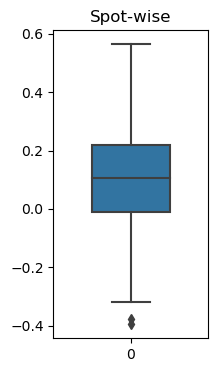

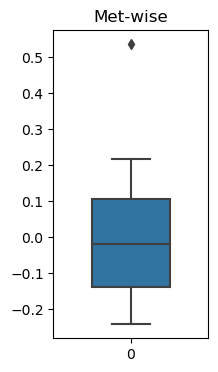

In [60]:
pre_met = pd.read_csv('/mnt/Mercury/home/liuzhaoyang/project/metabolomics/tools/scFEA/GBM_Multi_Omics/269_T_balance.csv',
                     index_col=0)
pre_met[pre_met < 0] = 0

pre_met_name_map = pd.read_csv('pre_met_name_map.csv', index_col=0)
pre_met.columns = list(pre_met_name_map.loc[pre_met.columns,:].loc[:,'HMDB'])
# pre_met = pre_met.T

ref_met = pd.read_csv('/mnt/Venus/home/liuzhaoyang/data/GBM_Spatial_MultiOmics/269_T/Integrated_ST_metabolite_HMDB_269_T.tsv',
                     sep='\t',
                      index_col=0
                     )

# common met
common_met = set(pre_met.columns).intersection(set(ref_met.index))

pre_met = pre_met.loc[:,common_met].T
ref_met = ref_met.loc[common_met,:]


# spot-wise
scFEA_spot_level_spearman_corrs, scFEA_spot_level_spearman_corrs_p = [], []

for tmp_i, tmp_id in enumerate(pre_met.columns):
    ground_sr = ref_met.loc[:,tmp_id]
    tmp_corr, tmp_p = spearmanr(pre_met.iloc[:,tmp_i].to_numpy(), ground_sr.to_numpy())
    scFEA_spot_level_spearman_corrs.append(tmp_corr)
    scFEA_spot_level_spearman_corrs_p.append(tmp_p)

# met-wise
scFEA_met_level_spearman_corrs, scFEA_met_level_spearman_corrs_p = [], []

for tmp_i, tmp_id in enumerate(pre_met.index):
    ground_sr = ref_met.loc[tmp_id,:]
    tmp_corr, tmp_p = spearmanr(np.abs(pre_met.iloc[tmp_i,:].to_numpy()), ground_sr.to_numpy())
    scFEA_met_level_spearman_corrs.append(tmp_corr)
    scFEA_met_level_spearman_corrs_p.append(tmp_p)

# scFEA_compass_spearman_corr_df = pd.DataFrame({'scFEA':scFEA_spot_level_spearman_corrs_p,
#                                             'Compass':compass_meta_level_spearman_corrs})


plt.figure(figsize=(2,4))
sns.boxplot(scFEA_spot_level_spearman_corrs, width=0.5).set_title('Spot-wise')
print(np.nanmedian(scFEA_spot_level_spearman_corrs))

plt.figure(figsize=(2,4))
sns.boxplot(scFEA_met_level_spearman_corrs, width=0.5).set_title('Met-wise')
print(np.nanmedian(scFEA_met_level_spearman_corrs))


In [63]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import random
import os
import pickle as pkl
import re
import datetime

import torch
import torch.nn.functional as F
from torch.nn import Sequential, Linear, ReLU, TransformerEncoder, TransformerEncoderLayer
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import OneCycleLR, LinearLR
from torcheval.metrics import MulticlassAUROC
from sklearn.model_selection import KFold

import torch_geometric
import torch_geometric.transforms as T
from torch_geometric.data import Data, Dataset, Batch
from torch_geometric.loader import DataLoader, NeighborLoader
from torch_geometric.nn.models import MLP
from torch_geometric.nn import GINConv, SAGEConv, SuperGATConv
from torch_geometric.nn.norm import BatchNorm, GraphNorm
from torch_geometric.nn.pool import global_add_pool, global_mean_pool
from torch_geometric.utils import remove_self_loops, add_self_loops

# from torch_geometric.loader import NeighborLoader

import seaborn as sns
from matplotlib import pyplot as plt
# from matplotlib import rcParams
# rcParams['font.family'] = 'Arial'

import importlib
import sys
sys.path.append('/mnt/Venus/home//liuzhaoyang/project/MetaSpace/')
import processing as MSpp
import model as MS



##################
# hyperparameter #
##################
train_val_frac = 0.8
k_folds = 5
loader_n_neighbors = 6
loader_nlayer_neighbors = 2
batch_size = 128
nfeature_out = 512

n_ST_GIN_layers=4
n_Meta_SAGE_layers=2
n_trans_encoder_layer=4

# pre-train
n_epoch_PT = 50
lr_PT = 0.005
wd_PT = 0.0001 # weight decay
# fine-tune
n_epoch_FT = 100
lr_FT = 0.0005
wd_FT = 0.0001

lw_biomass = 0.5
# lw_recon_zero = 0
model_save_step = 5

save_model_state = False

record = True

pct_start = 0.3
div_factor = 50
final_div_factor = 1000

random_seed = 7

nan_corr_num = 0
# pretrain_model_pth = './model_state_dic/lr_0.001_warmup_linearLR_step_15k_div_50_batch_64_GIN_meta_embed_GN_input_GN_residual_Transformer_out_linear_map_seed/epoch_11.pth'




class MS_model_GIN(torch.nn.Module):
    def __init__(
        self, 
        num_features,
        nfeature_out = nfeature_out,
        n_ST_GIN_layers = 2,
        n_Meta_SAGE_layers = 2,
        n_trans_encoder_layer = 3,
        SGAT_nmid=6,
        SGAT_nhead=8,
        GIN_eps = 0,
        train_GIN_eps = False,
        MLP_dr = 0.05,
        MLP_act = 'relu',
        MLP_norm = 'batch_norm'
    ):
        '''
        Gene-reaction mappint part:
            just a simple two layer NN for predicting reaction 'exp' from gene exp with g-r relation mask;
            will try more complex model later
            - gr_nchan_in: gene-reaction mapping input dim: num. of input gene
        GraphSAGE part:
            
        '''
        super().__init__()
        
        self.num_features = num_features
        self.nfeature_out = nfeature_out
        self.SGAT_nhead = SGAT_nhead
        
        self.input_GN = GraphNorm(self.num_features)
        
        self.identity = Linear(in_features=self.num_features, out_features=self.nfeature_out)
        
        self.ST_GIN_layers = torch.nn.ModuleList()
        for tmp_l in range(n_ST_GIN_layers):
            if tmp_l==0:
                self.ST_GIN_layers.append(
                    GINConv(
                        nn=MLP(
                            [self.num_features, 512, self.nfeature_out],
                            dropout=MLP_dr,
                            act=MLP_act,
                            norm=MLP_norm
                        ),
                        eps=GIN_eps,
                        train_eps=train_GIN_eps
                    )
                )
            else:
                self.ST_GIN_layers.append(
                    GINConv(
                        nn=MLP(
                            [self.nfeature_out, 512, self.nfeature_out],
                            dropout=MLP_dr,
                            act=MLP_act,
                            norm=MLP_norm
                        ),
                        eps=GIN_eps,
                        train_eps=train_GIN_eps
                    )
                )
                
        
        # self.Meta_SAGE_layers = torch.nn.ModuleList()
        # for tmp_l in range(n_Meta_SAGE_layers):
        #     self.Meta_SAGE_layers.append(
        #         SAGEConv(
        #             in_channels=1,
        #             out_channels=1
        #         )
        #     )       


        # ------------------- #
        # try SuperGAT layers #
        # ------------------- #
        self.SGAT_layer1 = SuperGATConv(
            in_channels=1, out_channels=SGAT_nmid,
            heads=SGAT_nhead, concat=True,
            dropout=0.1, attention_type='MX',
            edge_sample_ratio=0.8, is_undirected=False
        )
        # generally n_neighbor = 6, so just set layer1 out to 6
        self.SGAT_layer2 = SuperGATConv(
            in_channels=SGAT_nmid*SGAT_nhead, out_channels=1,
            heads=SGAT_nhead, concat=False, # final output just use average
            dropout=0.1, attention_type='MX',
            edge_sample_ratio=0.8, is_undirected=False
        )

        
        self.mlp_meta_zip = MLP(
            [self.num_features, 1024, 1024, self.nfeature_out],
            dropout=MLP_dr, 
            act=MLP_act, 
            norm=MLP_norm
        )
                
        self.tf_encoder_layer = TransformerEncoderLayer(
            d_model = self.nfeature_out*(n_ST_GIN_layers+n_Meta_SAGE_layers),
            nhead = 8,
            dim_feedforward = 2048,
            dropout = 0.1,
            batch_first = True
        )
        self.tf_encoder = TransformerEncoder(
            self.tf_encoder_layer,
            num_layers = n_trans_encoder_layer
        )
        
        self.linear_map_rxn = Linear(
            in_features = self.nfeature_out*(n_ST_GIN_layers+n_Meta_SAGE_layers), 
            out_features = self.num_features
        )
        # self.mlp_map_rxn = MLP(
        #     in_channels=self.nfeature_out*(n_ST_GIN_layers+n_Meta_SAGE_layers),
        #     out_channels=self.num_features,
        #     hidden_channels=512,
        #     num_layers=3,
        #     dropout=MLP_dr,
        #     act=MLP_act,
        #     norm=MLP_norm
        # )

               
    def forward(self, x, edge_index, meta_edge_index, batch):
        '''
        '''

        # input normalize
        x = self.input_GN(x, batch=batch)
        x_identity = self.identity(x).relu()
        
        ##########################
        # embedding spatial info #
        ##########################
        for tmp_l, gin in enumerate(self.ST_GIN_layers):
            st_embed = gin(st_embed, edge_index) if tmp_l > 0 else gin(x, edge_index)
            # st_embed = F.relu(st_embed)
            # print('st_embed shape {}'.format(st_embed.shape))
                        
            # concat each layer's graph readout
            if tmp_l == 0:
                st_concat = global_add_pool(torch.add(st_embed, x_identity).relu(), batch)
            else:
                st_concat = torch.cat(
                    (
                        st_concat, 
                        global_add_pool(torch.add(st_embed, x_identity).relu(), batch)
                    ),
                    dim=1
                )
            # print('st_concat shape {}'.format(st_concat.shape))        


        #############################
        # embedding metabolite info #
        #############################
        meta_embed = global_add_pool(x, batch)
        # print(meta_embed.shape)
        n_batch = meta_embed.shape[0]
        meta_embed = torch.reshape(meta_embed, (n_batch,self.num_features,1))
        # print(meta_embed.shape)


        # ---------------- #
        # SuperGAT version #
        # ---------------- #
        tmp_x = meta_embed.clone().detach()
        meta_embed = self.SGAT_layer1(meta_embed, meta_edge_index).relu()
        meta_concat = self.mlp_meta_zip(torch.reshape(torch.mean(meta_embed, dim=1), (n_batch,self.num_features)))
        meta_concat = torch.add(meta_concat, global_add_pool(x_identity, batch)).relu()

        # extract attention
        tmp_edge_index, _ = remove_self_loops(meta_edge_index)
        tmp_edge_index, _ = add_self_loops(tmp_edge_index, num_nodes=tmp_x.size(0))
        tmp_x = self.SGAT_layer1.lin(tmp_x).view(-1, self.SGAT_nhead, 1)
        meta_atte_m1 = self.SGAT_layer1.get_attention(
            edge_index_i=tmp_edge_index[1],
            x_i=tmp_x[tmp_edge_index[1]],
            x_j=tmp_x[tmp_edge_index[0]],
            num_nodes=tmp_x.size(0)
        )
        
        tmp_x = meta_embed.clone().detach()
        meta_embed = self.SGAT_layer2(meta_embed, meta_edge_index).relu()
        meta_concat = torch.cat(
            (
                meta_concat,
                torch.add(
                    self.mlp_meta_zip(torch.reshape(meta_embed, (n_batch,self.num_features))),
                    global_add_pool(x_identity, batch)
                ).relu()
            ),
             dim=1)

        # extract attention
        tmp_edge_index, _ = remove_self_loops(meta_edge_index)
        tmp_edge_index, _ = add_self_loops(tmp_edge_index, num_nodes=tmp_x.size(0))
        tmp_x = self.SGAT_layer2.lin(tmp_x).view(-1, self.SGAT_nhead, 1)
        meta_atte_m2 = self.SGAT_layer2.get_attention(
            edge_index_i=tmp_edge_index[1],
            x_i=tmp_x[tmp_edge_index[1]],
            x_j=tmp_x[tmp_edge_index[0]],
            num_nodes=tmp_x.size(0)
        )

        ##########################
        # concat ST & meta embed #
        ##########################
        st_out = self.tf_encoder(torch.cat((st_concat,meta_concat), dim=1))
        st_out = self.linear_map_rxn(st_out)
        # st_out = self.mlp_map_rxn(torch.cat((st_concat,meta_concat), dim=1))
        st_out = F.relu(st_out)
        
        return st_out, torch.cat((st_concat,meta_concat), dim=1), meta_atte_m1, meta_atte_m2
    


In [ ]:

# ----- #
# 269_T #
# ----- #
sct_269_T_df = pd.read_csv('/mnt/Venus/home//liuzhaoyang/data/GBM_Spatial_MultiOmics/269_T/Integrated_ST_sct_269_T.tsv', sep='\t', index_col=0)
compass_269_T_df = pd.read_csv('/mnt/Venus/home//liuzhaoyang/data/GBM_Spatial_MultiOmics/269_T/Compass/reactions.tsv', sep='\t', index_col=0)

metabolite_269_T_df = pd.read_csv('/mnt/Venus/home//liuzhaoyang/data/GBM_Spatial_MultiOmics/269_T/Integrated_ST_metabolite_HMDB_269_T.tsv', sep='\t', index_col=0)


def get_reaction_consistencies(compass_reaction_penalties, min_range=1e-3):
    """
        Converts the raw penalties outputs of compass into scores per reactions where higher numbers indicate more activity
    """
    tmp_df = -np.log(compass_reaction_penalties + 1)
    tmp_df = tmp_df[tmp_df.max(axis=1) - tmp_df.min(axis=1) >= min_range]
    tmp_df = tmp_df - tmp_df.min().min()
    return tmp_df
compass_269_T_df = get_reaction_consistencies(compass_269_T_df)


common_hmdb = list((set(S_meta_mapping.dropna().hmdbID)))


compass_269_T_df_rxns = [tmp_rxn[:-4] for tmp_rxn in list(compass_269_T_df.index)]
compass_269_T_df = compass_269_T_df.loc[np.isin(compass_269_T_df_rxns, list(S.columns)),:]
compass_269_T_df_direction = [1 if tmp_rxn[-3:] == 'pos' else -1 for tmp_rxn in list(compass_269_T_df.index)]
for i in range(compass_269_T_df.shape[0]):
    compass_269_T_df.iloc[i,:] = compass_269_T_df.iloc[i,:]*compass_269_T_df_direction[i]
# compass_269_T_df.iloc[:,:-1].multiply(pd.DataFrame(compass_269_T_df_direction))
compass_269_T_df['rxn'] = [tmp_rxn[:-4] for tmp_rxn in list(compass_269_T_df.index)]
# cal no direction rxn df
tmp_list = []
rxn_list = list(set([tmp_rxn[:-4] for tmp_rxn in list(compass_269_T_df.index)]))
for tmp_i, tmp_rxn in enumerate(rxn_list):
    tmp_df = compass_269_T_df.loc[compass_269_T_df.rxn == tmp_rxn,:].iloc[:,:-1]
    if tmp_df.shape[0] > 1:
        tmp_df = tmp_df.sum(axis=0)
        tmp_df = pd.DataFrame(tmp_df).T
        # tmp_df.index = [tmp_rxn]   
    tmp_list.append(tmp_df.iloc[0,:].values)
compass_269_T_nodirect_df = pd.DataFrame(tmp_list)
compass_269_T_nodirect_df.index = rxn_list
compass_269_T_nodirect_df.columns = list(compass_269_T_df.columns)[:-1]
S_trim = S.loc[:,np.isin(S.columns, compass_269_T_nodirect_df.index)]
compass_metabolite = S_trim.dot(compass_269_T_nodirect_df)
compass_metabolite = pd.concat([compass_metabolite, S_meta_mapping], axis=1)
compass_metabolite.dropna(inplace=True)



# ------------ #
# model output #
# ------------ #

torch.manual_seed(random_seed)
test_loader_248T = NeighborLoader(
    gbm_graph_list[4],
    # Sample 30 neighbors for each node for 2 iterations
    num_neighbors=[loader_n_neighbors] * loader_nlayer_neighbors,
    # Use a batch size of 128 for sampling training nodes
    batch_size=batch_size,
    disjoint=True
)

model = model.to(device)
model.load_state_dict(torch.load('./model_state_dic/240419-1502_fine-tuning_SSL_v0_1_5_3_fine_freeze/.p'))

model.eval()

out_fluxes_list, pos_list, met_list = [], [], []
with torch.no_grad():
    for n_batch, tmp_graph in enumerate(test_loader_248T):
        tmp_graph = tmp_graph.to(device)
        # raw_embed = tmp_graph.x[:tmp_graph.batch_size].to(device)
        out_fluxes, out_concat, meta_atte_m1, meta_atte_m2 = model(
            tmp_graph.x,
            tmp_graph.edge_index,
            meta_edge_index,
            tmp_graph.batch
        )
        
        raw_embed = tmp_graph.meta_x[:tmp_graph.batch_size]

        loss = F.mse_loss(out_fluxes, raw_embed, reduction='mean')
        
        out_fluxes = out_fluxes.detach().cpu().numpy()
        out_fluxes = pd.DataFrame(out_fluxes)
        out_fluxes.columns = metabolite_269_T_df.index
        out_fluxes.index = list(tmp_graph.input_id.detach().cpu().numpy())
        out_fluxes_list.append(out_fluxes)
        
        tmp_met = pd.DataFrame(tmp_graph.meta_x[:tmp_graph.batch_size].detach().cpu().numpy())
        tmp_met.index = list(tmp_graph.input_id.detach().cpu().numpy())
        tmp_met.columns = metabolite_269_T_df.index
        met_list.append(tmp_met)
        
        tmp_pos = pd.DataFrame(tmp_graph.pos[:tmp_graph.batch_size].detach().cpu().numpy())
        tmp_pos.index = list(tmp_graph.input_id.detach().cpu().numpy())
        tmp_pos.columns = ['x', 'y']
        pos_list.append(tmp_pos)        
        # pos_list.append(tmp_graph.pos[:tmp_graph.batch_size].detach().cpu().numpy())


full_out_fluxes = pd.concat(out_fluxes_list)
print('full_out_fluxes: {}'.format(full_out_fluxes.shape))
        

# avi_S_mapping = S_meta_mapping.dropna()
# avi_hmdb = ['HMDB{}'.format(tmp_id) for tmp_id in avi_S_mapping.loc[:,'hmdbID']]
# avi_names = list(avi_S_mapping.index)
# avi_S_mapping = pd.DataFrame({'meta_name':avi_names})
# avi_S_mapping.index = avi_hmdb

full_out_meta = pd.concat(met_list)
print('full_out_meta: {}'.format(full_out_meta.shape))

full_out_pos = pd.concat(pos_list)
print('full_out_pos: {}'.format(full_out_pos.shape))

# assign spot barcodes
assign_barcodes = sct_269_T_df.columns[full_out_fluxes.index]
full_out_fluxes.index = assign_barcodes
full_out_meta.index = assign_barcodes
full_out_pos.index = assign_barcodes

# align meta names with HMDBID
# full_out_fluxes = pd.concat([full_out_fluxes, S_meta_mapping.T], axis=0)
# full_out_fluxes = full_out_fluxes.dropna(axis=1)
# full_out_fluxes = full_out_fluxes.iloc[:-1,:]
avi_S_mapping = S_meta_mapping.dropna()
avi_hmdb = ['HMDB{}'.format(tmp_id) for tmp_id in avi_S_mapping.loc[:,'hmdbID']]
full_out_fluxes = full_out_fluxes.loc[:,np.isin(list(full_out_fluxes.columns),avi_hmdb)]
avi_names = []
for tmp_id in list(full_out_fluxes.columns):
    tmp_id = tmp_id.replace('HMDB','')
    tmp_name = avi_S_mapping.loc[avi_S_mapping.hmdbID == tmp_id,:].index[0]
    avi_names.append(tmp_name)
full_out_fluxes.columns = avi_names
# full_out_fluxes.columns = list(avi_S_mapping.loc[np.isin(['HMDB{}'.format(tmp_id) for tmp_id in avi_S_mapping.hmdbID], avi_hmdb),:].index)
print('full_out_fluxes aligned : {}'.format(full_out_fluxes.shape))

full_out_meta = full_out_meta.loc[:,np.isin(list(full_out_meta.columns),avi_hmdb)]
avi_names = []
for tmp_id in list(full_out_meta.columns):
    tmp_id = tmp_id.replace('HMDB','')
    tmp_name = avi_S_mapping.loc[avi_S_mapping.hmdbID == tmp_id,:].index[0]
    avi_names.append(tmp_name)
full_out_meta.columns = avi_names
# full_out_fluxes.columns = list(avi_S_mapping.loc[np.isin(['HMDB{}'.format(tmp_id) for tmp_id in avi_S_mapping.hmdbID], avi_hmdb),:].index)
print('full_out_meta aligned : {}'.format(full_out_meta.shape))


# align metabolite df
metabolite_269_T_df.loc[:,'hmdbID'] = [tmp_id.replace('HMDB','') for tmp_id in list(metabolite_269_T_df.index)]
metabolite_269_T_df = pd.merge(metabolite_269_T_df, S_meta_mapping)
metabolite_269_T_df.index = [S_meta_mapping.loc[S_meta_mapping.hmdbID == tmp_id,:].index[0] for tmp_id in metabolite_269_T_df.loc[:,'hmdbID']]
metabolite_269_T_df.loc[:,'hmdbID'] = metabolite_269_T_df.index
metabolite_269_T_df = metabolite_269_T_df.sort_index()
metabolite_269_T_df.drop_duplicates(inplace=True)
metabolite_269_T_df = metabolite_269_T_df.iloc[:,:-1].T.sort_index().astype(float)
print('metabolite_269_T_df : {}'.format(metabolite_269_T_df.shape))

full_out_fluxes = full_out_fluxes.loc[:,np.isin(list(full_out_fluxes.columns), list(metabolite_269_T_df.columns))]
full_out_fluxes = full_out_fluxes.T.sort_index().T.sort_index().astype(float)
print('full_out_fluxes: {}'.format(full_out_fluxes.shape))

full_out_meta = full_out_meta.T.sort_index().T.sort_index().astype(float)
print('full_out_meta: {}'.format(full_out_meta.shape))

compass_metabolite = compass_metabolite.iloc[:,:-1].loc[np.isin(list(compass_metabolite.index), list(full_out_meta.columns))]
compass_metabolite = compass_metabolite.loc[:,np.isin(compass_metabolite.columns, full_out_meta.index)]
compass_metabolite = compass_metabolite.sort_index().T.sort_index().astype(float)
print('compass_metabolite: {}'.format(compass_metabolite.shape))

full_out_pos = full_out_pos.sort_index()

# select_meta = ['glc_D', 'gln_L', 'lac_D', 'pyr']

# divide signal into 
# 'a+++': > m+3sd
# 'a++' : m+3sd < x < m+2sd
# 'a+' : m+2sd < x < m+sd
# 'a': m+sd < x < m
# 'b': m > x > m-sd
# 'b-': m-sd > x > m-2sd
# 'b--': m-2sd > x > m-3sd
# 'b---': m-3sd> x

# for each metabolite

sign_num_dic = {
    'a+++': 4,
    'a++': 3,
    'a+': 2,
    'a': 1,
    'b': -1,
    'b-': -2,
    'b--': -3,
    'b---': -4
}

sign_num_dic = {
    'a+++': 1,
    'a++': 2,
    'a+': 3,
    'a': 4,
    'b': 5,
    'b-': 6,
    'b--': 7,
    'b---': 8
}

# ---------- #
# step split #
# ---------- #
metabolite_269_T_step = (full_out_meta - full_out_meta.mean(axis=0))/full_out_meta.std(axis=0)
metabolite_269_T_step = metabolite_269_T_step.fillna(0).applymap(lambda x: sign_num_dic['a{}'.format('+'*min(int(x), 3))] if x > 0 else sign_num_dic['b{}'.format('-'*min(abs(int(x)), 3))])
metabolite_269_T_step = torch.tensor(metabolite_269_T_step.values)
# metabolite_269_T_step = F.one_hot(torch.tensor(metabolite_269_T_step.values))

compass_metabolite_step = (compass_metabolite - compass_metabolite.mean(axis=0))/compass_metabolite.std(axis=0)
compass_metabolite_step = compass_metabolite_step.fillna(0).applymap(lambda x: sign_num_dic['a{}'.format('+'*min(int(x), 3))] if x > 0 else sign_num_dic['b{}'.format('-'*min(abs(int(x)), 3))])
compass_metabolite_step = F.one_hot(torch.tensor(compass_metabolite_step.values))

full_out_fluxes_step = (full_out_fluxes - full_out_fluxes.mean(axis=0))/full_out_fluxes.std(axis=0)
full_out_fluxes_step = full_out_fluxes_step.fillna(0).applymap(lambda x: sign_num_dic['a{}'.format('+'*min(int(x), 3))] if x > 0 else sign_num_dic['b{}'.format('-'*min(abs(int(x)), 3))])
full_out_fluxes_step = F.one_hot(torch.tensor(full_out_fluxes_step.values))


compass_AUC, MS_AUC = [], []
for tmp_mi in range(metabolite_269_T_step.shape[1]):
    metric = MulticlassAUROC(num_classes=9)
    metric.update(compass_metabolite_step[:,tmp_mi,:], metabolite_269_T_step[:,tmp_mi])
    tmp_m = metric.compute().detach().item()
    compass_AUC.append(tmp_m)

    metric = MulticlassAUROC(num_classes=9)
    metric.update(full_out_fluxes_step[:,tmp_mi,:], metabolite_269_T_step[:,tmp_mi])
    tmp_m = metric.compute().detach().item()
    MS_AUC.append(tmp_m)


MS_compass_AUC_df = pd.DataFrame({'MS':MS_AUC, 'Compass':compass_AUC})


plt.figure(figsize=(4,4))
sns.boxplot(MS_compass_AUC_df.loc[:,['MS','Compass']], width=0.5)
print(np.nanmedian(MS_AUC))
print(np.nanmedian(compass_AUC))